In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [7]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [9]:
# getting some information about the data
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


<Axes: >

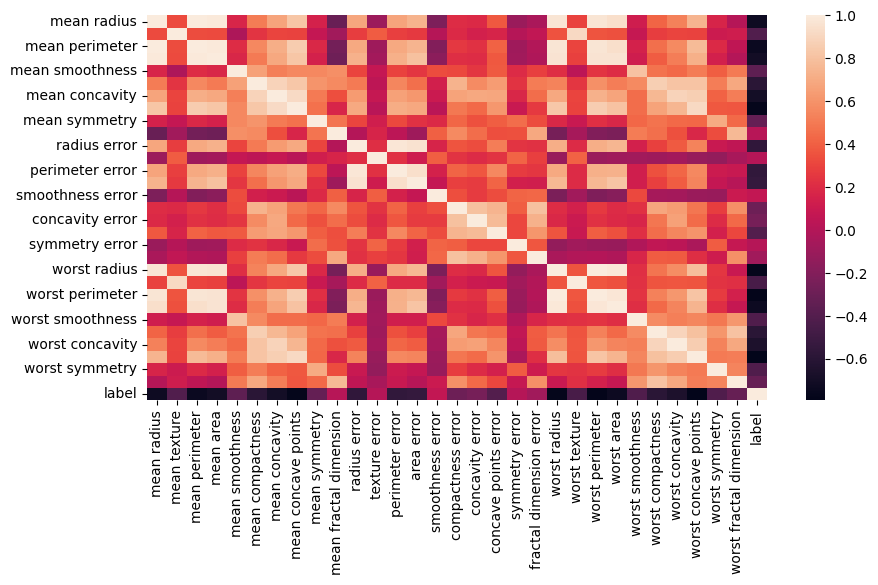

In [17]:
corr_matrix=data_frame.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix)

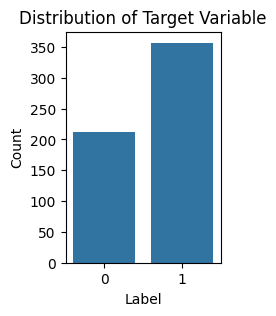

In [18]:
# Bar chart for target variable distribution
plt.figure(figsize=(2, 3))
sns.countplot(x='label', data=data_frame)
plt.title('Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [22]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracyLR = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracyLR)

Accuracy on training data =  0.989010989010989


In [23]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracyLR = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracyLR)

Accuracy on test data =  0.9736842105263158


In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
# precision
precision_lr = precision_score(Y_test, X_test_prediction)
print('Precision on test data for Logistic Regression = ', precision_lr)

# recall
recall_lr = recall_score(Y_test, X_test_prediction)
print('Recall on test data for Logistic Regression = ', recall_lr)


Precision on test data for Logistic Regression =  0.9852941176470589
Recall on test data for Logistic Regression =  0.9710144927536232


Confusion matrix for Logistic Regression:
[[44  1]
 [ 2 67]]


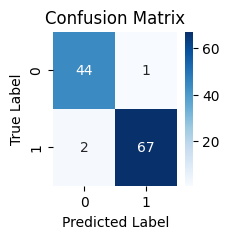

Effectiveness of the model =  0.9736842105263158
TPR =  0.9710144927536232
FPR =  0.022222222222222223


In [26]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusion_matrix_lr = confusion_matrix(Y_test, X_test_prediction)
print('Confusion matrix for Logistic Regression:')
print(confusion_matrix_lr)
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
TN, FP, FN, TP = confusion_matrix_lr.ravel()
effectiveness = (TP + TN) / (TP + TN + FP + FN)
print('Effectiveness of the model = ', effectiveness)
# calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR = ', TPR)
print('FPR = ', FPR)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [29]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracyKNN = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracyKNN)

Accuracy on training data =  0.9758241758241758


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracyKNN = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data  = ', test_data_accuracyKNN)

Accuracy on test data  =  0.9736842105263158


In [31]:
# precision
precision_knn = precision_score(Y_test, X_test_prediction)
print('Precision on test data for KNN = ', precision_knn)

# recall
recall_knn = recall_score(Y_test, X_test_prediction)
print('Recall on test data for KNN = ', recall_knn)

Precision on test data for KNN =  0.9583333333333334
Recall on test data for KNN =  1.0


In [32]:
# confusion matrix
confusion_matrix_knn = confusion_matrix(Y_test, X_test_prediction)
print('Confusion matrix for KNN:')
print(confusion_matrix_knn)

Confusion matrix for KNN:
[[42  3]
 [ 0 69]]


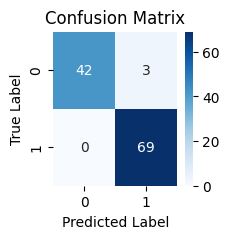

Effectiveness of the model =  0.9736842105263158
TPR =  1.0
FPR =  0.06666666666666667


In [33]:
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
TN, FP, FN, TP = confusion_matrix_knn.ravel()
effectiveness = (TP + TN) / (TP + TN + FP + FN)
print('Effectiveness of the model = ', effectiveness)
# calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR = ', TPR)
print('FPR = ', FPR)

In [34]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracyDT = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracyDT)

Accuracy on training data =  1.0


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracyDT = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracyDT)

Accuracy on test data =  0.9035087719298246


Precision Decision Tree: 0.9188657919308074
Confusion matrix Decision Tree:
[[43  2]
 [ 8 61]]


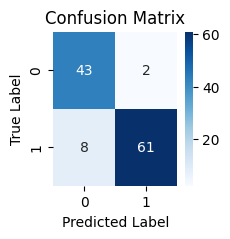

Effectiveness of the model =  0.9122807017543859
TPR =  0.8840579710144928
FPR =  0.044444444444444446


In [37]:
dt_model = DecisionTreeClassifier(random_state=0)

# fit the model to the training data
dt_model.fit(X_train, Y_train)

# make predictions on the test data
Y_test_pred = dt_model.predict(X_test)

# compute the precision matrix
precision_dt = precision_score(Y_test, Y_test_pred, average='weighted')
print('Precision Decision Tree:', precision_dt)

# compute the confusion matrix
confusion_dt = confusion_matrix(Y_test, Y_test_pred)
print('Confusion matrix Decision Tree:')
print(confusion_dt)
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = confusion_dt.ravel()
effectiveness = (TP + TN) / (TP + TN + FP + FN)
print('Effectiveness of the model = ', effectiveness)
# calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR = ', TPR)
print('FPR = ', FPR)

In [38]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracyRF = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracyRF)

Accuracy on training data =  1.0


In [40]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracyRF = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracyRF)

Accuracy on test data =  0.9035087719298246


In [41]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracyRF = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracyRF)

Accuracy on test data =  0.9035087719298246


Precision Random Forest: 0.9389722708305289
Confusion matrix Random Forest:
[[42  3]
 [ 4 65]]


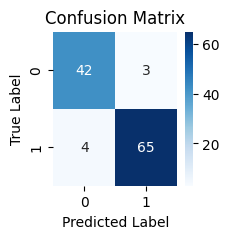

Effectiveness of the model =  0.9385964912280702
TPR =  0.9420289855072463
FPR =  0.06666666666666667


In [42]:
rf_model = RandomForestClassifier(random_state=0)

# fit the model to the training data
rf_model.fit(X_train, Y_train)

# make predictions on the test data
Y_test_pred = rf_model.predict(X_test)

# compute the precision matrix
precision_rf = precision_score(Y_test, Y_test_pred, average='weighted')
print('Precision Random Forest:', precision_rf)

# compute the confusion matrix
confusion_rf = confusion_matrix(Y_test, Y_test_pred)
print('Confusion matrix Random Forest:')
print(confusion_rf)
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = confusion_rf.ravel()
effectiveness = (TP + TN) / (TP + TN + FP + FN)
print('Effectiveness of the model = ', effectiveness)
# calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR = ', TPR)
print('FPR = ', FPR)

In [43]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [44]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracySVC = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracySVC)

Accuracy on training data =  0.9934065934065934


In [45]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracySVC = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracySVC)

Accuracy on test data =  0.956140350877193


Precision SVC: 0.9579346092503987
Confusion matrix SVC:
[[44  1]
 [ 4 65]]


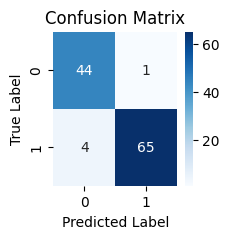

Effectiveness of the model =  0.956140350877193
TPR =  0.9420289855072463
FPR =  0.022222222222222223


In [46]:
# create an SVC model
svm_model = SVC(kernel='linear', random_state=0)

# fit the model to the training data
svm_model.fit(X_train, Y_train)

# make predictions on the test data
Y_test_pred = svm_model.predict(X_test)

# compute the precision matrix
precision_svm = precision_score(Y_test, Y_test_pred, average='weighted')
print('Precision SVC:', precision_svm)

# compute the confusion matrix
confusion_svm = confusion_matrix(Y_test, Y_test_pred)
print('Confusion matrix SVC:')
print(confusion_svm)
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = confusion_svm.ravel()
effectiveness = (TP + TN) / (TP + TN + FP + FN)
print('Effectiveness of the model = ', effectiveness)
# calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR = ', TPR)
print('FPR = ', FPR)

In [47]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, Y_train)

SVC(random_state=0)

In [48]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracySVM = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracySVM)

Accuracy on training data =  0.9868131868131869


In [49]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracySVM = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracySVM)

Accuracy on test data =  0.9649122807017544


In [50]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [51]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracyGNB = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracyGNB)

Accuracy on training data =  0.9296703296703297


In [52]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracyGNB = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracyGNB)

Accuracy on test data =  0.9385964912280702


Precision GaussianNB: 0.9389722708305289
Confusion matrix GaussianNB:
[[42  3]
 [ 4 65]]


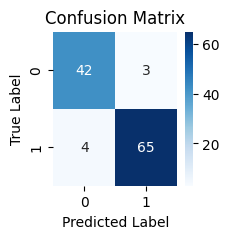

Effectiveness of the model =  0.9385964912280702
TPR =  0.9420289855072463
FPR =  0.06666666666666667


In [53]:
gnb_model = GaussianNB()

# fit the model to the training data
gnb_model.fit(X_train, Y_train)

# make predictions on the test data
Y_test_pred = gnb_model.predict(X_test)

# compute the precision matrix
precision_gnb = precision_score(Y_test, Y_test_pred, average='weighted')
print('Precision GaussianNB:', precision_gnb)

# compute the confusion matrix
confusion_gnb = confusion_matrix(Y_test, Y_test_pred)
print('Confusion matrix GaussianNB:')
print(confusion_gnb)
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_gnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


TN, FP, FN, TP = confusion_gnb.ravel()
effectiveness = (TP + TN) / (TP + TN + FP + FN)
print('Effectiveness of the model = ', effectiveness)
# calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR = ', TPR)
print('FPR = ', FPR)

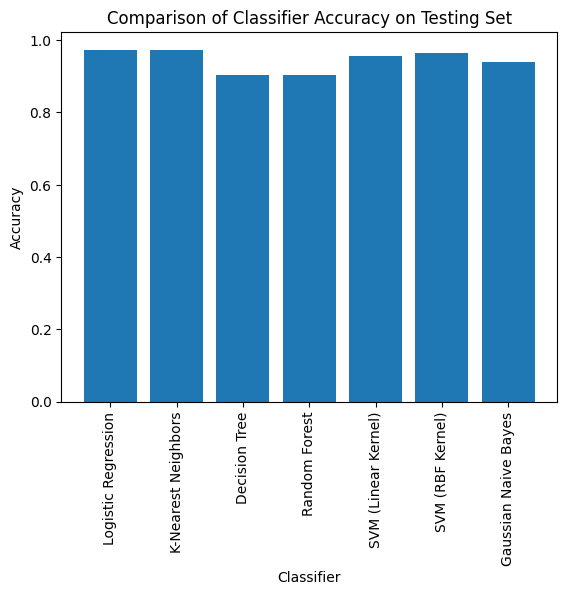

In [54]:
import matplotlib.pyplot as plt

# Create a list of classifiers
classifiers = [
    ('Logistic Regression', training_data_accuracyLR, test_data_accuracyLR),
    ('K-Nearest Neighbors', training_data_accuracyKNN, test_data_accuracyKNN),
    ('Decision Tree', training_data_accuracyDT, test_data_accuracyDT),
    ('Random Forest', training_data_accuracyRF, test_data_accuracyRF),
    ('SVM (Linear Kernel)', training_data_accuracySVC, test_data_accuracySVC),
    ('SVM (RBF Kernel)', training_data_accuracySVM, test_data_accuracySVM),
    ('Gaussian Naive Bayes', training_data_accuracyGNB, test_data_accuracyGNB)
]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar chart
ax.bar([c[0] for c in classifiers], [c[2] for c in classifiers])

# Set the x-axis label
ax.set_xlabel('Classifier')

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Comparison of Classifier Accuracy on Testing Set')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [55]:
from sklearn.svm import SVC

best_model = SVC(kernel='linear', random_state=0)
best_model.fit(X_train, Y_train)


SVC(kernel='linear', random_state=0)

In [56]:
import joblib

# Save the trained best model
joblib.dump(best_model, "best_breast_cancer_model.pkl")

# Save the scaler used during train/test split
joblib.dump(scaler, "scaler.pkl")

# Save feature names for reference
import json
with open('feature_names.json', 'w') as f:
    json.dump(breast_cancer_dataset.feature_names.tolist(), f)